# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [1]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

u:\Lektionen\Scientific_Programming_FS2024\scientific_programming\Week_07\challenge


## Functions to get the content of RSS-Feeds

In [2]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [3]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,War es doch die «Andromeda»? Schweden hat die ...,"Wed, 07 Feb 2024 11:29:10 GMT",ld.1777755,Ermittler wissen womöglich mehr über die Nord-...
1,An Bord eines Evakuierungsfluges: Nur die Schw...,"Wed, 07 Feb 2024 04:30:00 GMT",ld.1777426,Die Vereinigten Arabischen Emirate fliegen reg...
2,Gibt es bald nicht mehr genug Kaffee auf der W...,"Wed, 07 Feb 2024 04:30:00 GMT",ld.1772178,Die Nachfrage nach dem koffeinhaltigen Getränk...
3,«Nein heisst Nein?»: Deutschland blockiert neu...,"Wed, 07 Feb 2024 10:44:15 GMT",ld.1777735,Die EU wollte den Straftatbestand der Vergewal...
4,Ist der Migration-Ukraine-Deal schon tot? Der ...,"Wed, 07 Feb 2024 04:30:00 GMT",ld.1777604,Der amerikanische Senator James Lankford hat f...
5,Ein gewöhnlicher US-Bürger: Ex-Präsident Donal...,"Tue, 06 Feb 2024 20:02:39 GMT",ld.1777682,"Donald Trump kann für die Ereignisse, die zum ..."
6,Mit Senegal wankt nun auch eine von Afrikas st...,"Tue, 06 Feb 2024 15:25:57 GMT",ld.1777631,Senegal hat nie einen Putsch erlebt. Nun aber ...
7,Chiles Ex-Präsident Sebastián Piñera kommt bei...,"Tue, 06 Feb 2024 20:44:08 GMT",ld.1777726,Sebastián Piñera war einer der reichsten Unter...
8,Koalitionsverhandlungen in den Niederlanden sc...,"Wed, 07 Feb 2024 12:55:16 GMT",ld.1777722,Elf Wochen nach der Parlamentswahl ist die Reg...
9,Korruption und kriminelle Netzwerke: Bulgarien...,"Tue, 06 Feb 2024 16:00:00 GMT",ld.1777577,"Sofia unternimmt grosse Anstrengungen, um sich..."


## Getting infos from multiple RSS-Feeds

In [4]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Pferdesport: US-Dressurreiter Cesar Parra vom ...,"Wed, 7 Feb 2024 14:09:00 +0100",https://www.spiegel.de/sport/pferdesport-us-dr...,"Der Weltreitverband untersucht Videos, die mut..."
1,"Super Bowl 2024: Uhrzeit, TV-Übertragung, Halb...","Wed, 7 Feb 2024 14:09:00 +0100",https://www.spiegel.de/sport/american-football...,Highlight im Glücksspielparadies Las Vegas: Im...
2,Ungarn: EU erklärt Souveränitätsgesetz für rec...,"Wed, 7 Feb 2024 14:02:00 +0100",https://www.spiegel.de/ausland/ungarn-eu-erkla...,Mit einem neuen Gesetz wollte sich Ungarns Reg...
3,Europawahl 2024: Letzte Generation will für EU...,"Wed, 7 Feb 2024 13:46:00 +0100",https://www.spiegel.de/politik/deutschland/eur...,"Das Festkleben soll Geschichte sein, die Zukun..."
4,Asien Cup: Jürgen Klinsmann wird in Südkorea n...,"Wed, 7 Feb 2024 13:36:00 +0100",https://www.spiegel.de/sport/fussball/asien-cu...,Beim Asien Cup scheiterte Südkorea nach einer ...
5,Tägliches Quiz beim SPIEGEL: 7 Fragen zum Allg...,"Wed, 7 Feb 2024 13:26:00 +0100",https://www.spiegel.de/panorama/taegliches-qui...,Jeden Tag gibt es sieben Fragen zu den wichtig...
6,Renk: Panzer-Zulieferer holt Börsengang nach,"Wed, 7 Feb 2024 13:26:00 +0100",https://www.spiegel.de/wirtschaft/unternehmen/...,Der Panzergetriebe-Hersteller Renk hat den ern...
7,Wunsiedel: Tod eines Mädchens in Kinderheim – ...,"Wed, 7 Feb 2024 13:21:00 +0100",https://www.spiegel.de/panorama/justiz/wunsied...,Ein Zwölfjähriger hat laut seinem Anwalt zugeg...
8,Wladimir Putin: Kreml kommentiert Tucker-Carls...,"Wed, 7 Feb 2024 13:00:00 +0100",https://www.spiegel.de/ausland/wladimir-putin-...,Tucker Carlson hat ein Interview mit Russlands...
9,Umfrage zu Sparstrategien gegen Inflation: Gün...,"Wed, 7 Feb 2024 12:56:00 +0100",https://www.spiegel.de/wirtschaft/soziales/umf...,Menschen in Deutschland leiden unterschiedlich...


## Finding the k most frequent words per RSS-Feed title

In [5]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Pferdesport:', 1), ('US-Dressurreiter', 1), ('Cesar', 1), ('Parra', 1), ('vom', 1)]
[('Super', 1), ('Bowl', 1), ('2024:', 1), ('Uhrzeit,', 1), ('TV-Übertragung,', 1)]
[('Ungarn:', 1), ('EU', 1), ('erklärt', 1), ('Souveränitätsgesetz', 1), ('für', 1)]
[('Europawahl', 1), ('2024:', 1), ('Letzte', 1), ('Generation', 1), ('will', 1)]
[('Asien', 1), ('Cup:', 1), ('Jürgen', 1), ('Klinsmann', 1), ('wird', 1)]
[('Tägliches', 1), ('Quiz', 1), ('beim', 1), ('SPIEGEL:', 1), ('7', 1)]
[('Renk:', 1), ('Panzer-Zulieferer', 1), ('holt', 1), ('Börsengang', 1), ('nach', 1)]
[('in', 2), ('Wunsiedel:', 1), ('Tod', 1), ('eines', 1), ('Mädchens', 1)]
[('Wladimir', 1), ('Putin:', 1), ('Kreml', 1), ('kommentiert', 1), ('Tucker-Carlson-Interview', 1)]
[('Umfrage', 1), ('zu', 1), ('Sparstrategien', 1), ('gegen', 1), ('Inflation:', 1)]
[('Trainer', 2), ('Afrika-Cup', 1), ('2024:', 1), ('Südafrika', 1), ('überrascht', 1)]
[('Nordholz', 1), ('im', 1), ('Landkreis', 1), ('Cuxhaven:', 1), ('Schulbus', 1)]
[('Isa

## Create a wordcloud with the most frequent words in RSS-Feed titles

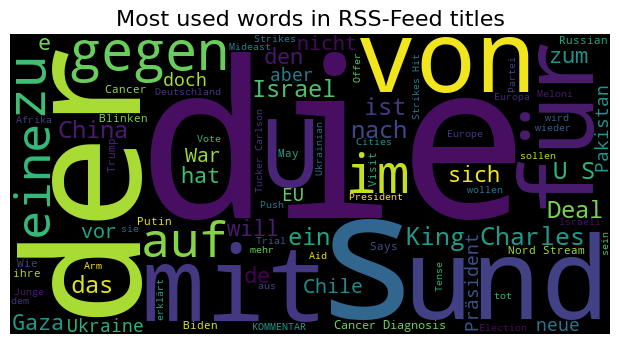

In [6]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [7]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-02-07 14:11:15
Python Version: 3.10.13
-----------------------------------
